In [2]:
import numpy as np

In [8]:
data = dict(np.load(r'C:\Users\omgui\Desktop\BASUS\TentSim_v1p9p3_13Jun25-101910\Pre_v1p1_13Jun25-102731\Pre_v1p113Jun25-101910-preparams.par13Jun25-102731.npz', allow_pickle=True))

In [9]:
amps = data['handlesA'].item()['strikeamp']
amps = amps[amps>0]

In [10]:
amps.shape

(697,)

In [11]:
widths = data['datastatA'].item()['sig']

In [13]:
amps_gauss = data['datastatA'].item()['A']

In [12]:
len(widths)

698

In [15]:
len(amps_gauss)

698

In [35]:
import pandas as pd
features = pd.DataFrame({
    "amplitude": data['datastatA'].item()['A'],
    "sigma": data['datastatA'].item()['sig'],
    "center": data['datastatA'].item()['mean']
})

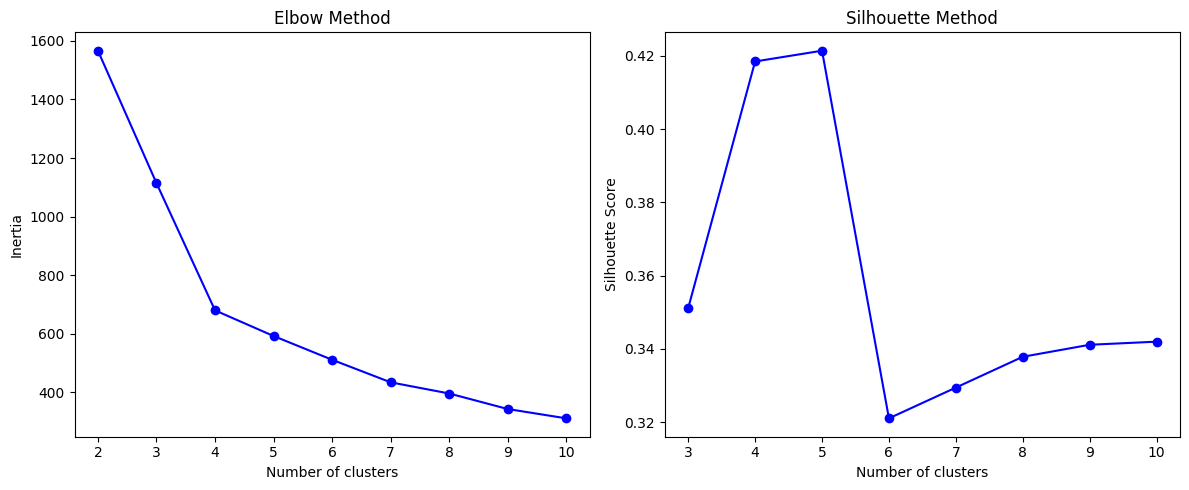

Optimal number of clusters: 4


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Determine Optimal Number of Clusters
# Using Elbow Method and Silhouette Score
range_n_clusters = range(2, 11)
inertias = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    inertias.append(kmeans.inertia_)
    
    if n_clusters > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(scaled_features, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Method plot
ax1.plot(range_n_clusters, inertias, 'bo-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

# Silhouette Score plot
ax2.plot(range_n_clusters[1:], silhouette_scores[1:], 'bo-')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method')

plt.tight_layout()
plt.show()

# Choose optimal number of clusters (you can adjust this based on the plots)
optimal_clusters = np.argmax(silhouette_scores[1:]) + 2  # +2 because we start from 2 clusters

print(f"Optimal number of clusters: {optimal_clusters}")

# Step 3: Perform Clustering with Optimal Number
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
features['cluster'] = kmeans.fit_predict(scaled_features)

# Step 4: Create Interactive 3D Plot
fig = px.scatter_3d(
    features,
    x='amplitude',
    y='sigma',
    z='center',
    color='cluster',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='3D Cluster Visualization',
    labels={'amplitude': 'Amplitude', 'sigma': 'Sigma', 'center': 'Center'},
    hover_name='cluster'
)

# Customize the plot
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
fig.update_layout(scene=dict(
    xaxis_title='Amplitude',
    yaxis_title='Sigma',
    zaxis_title='Center'
))

fig.show()


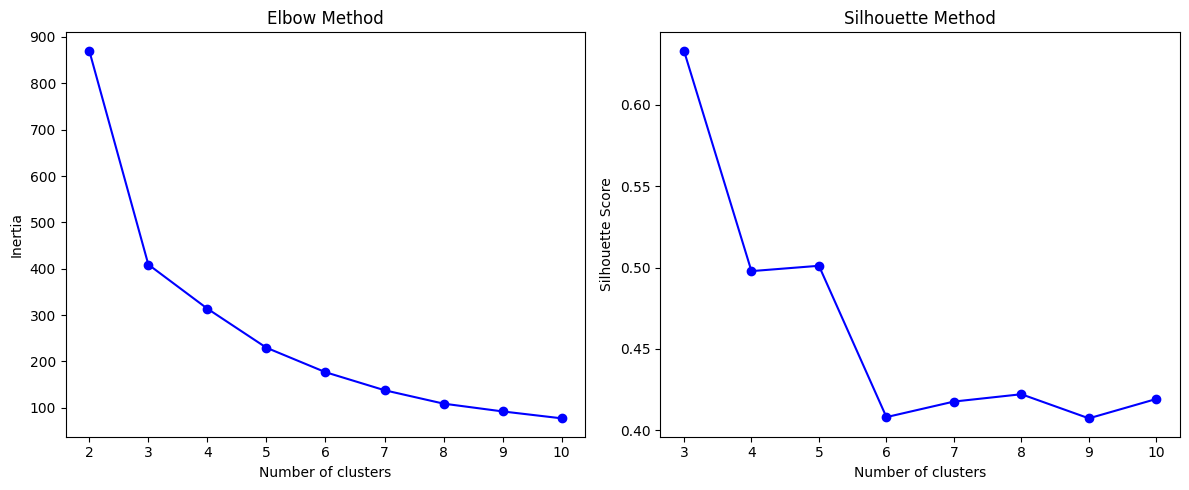

Optimal number of clusters: 2


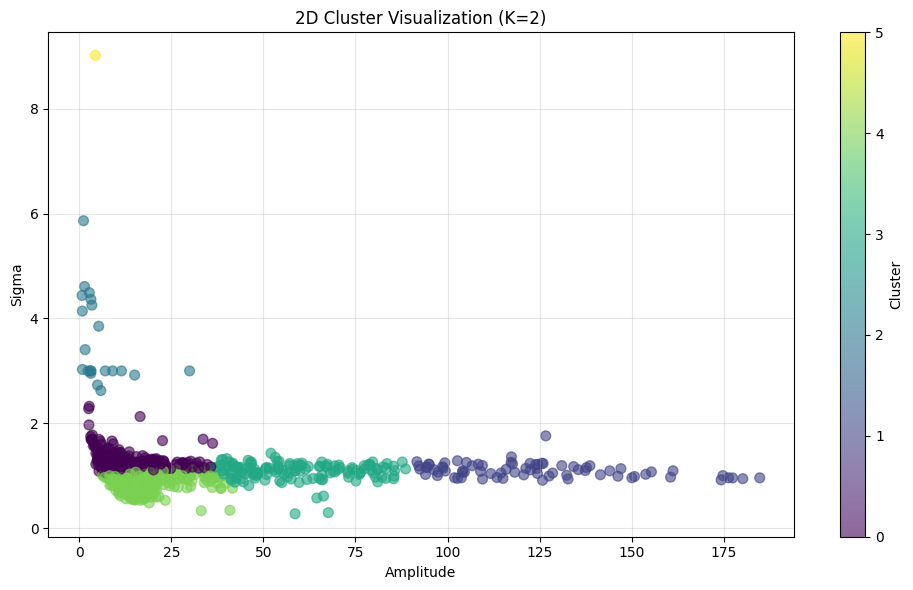

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px

# Assuming your data is already loaded as 'features' DataFrame
features = pd.DataFrame({
    "amplitude": data['datastatA'].item()['A'],
    "sigma": data['datastatA'].item()['sig']
})

# Step 1: Data Preprocessing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Determine Optimal Number of Clusters
range_n_clusters = range(2, 11)
inertias = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    inertias.append(kmeans.inertia_)
    
    if n_clusters > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(scaled_features, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# Plotting the evaluation metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Method plot
ax1.plot(range_n_clusters, inertias, 'bo-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

# Silhouette Score plot
ax2.plot(range_n_clusters[1:], silhouette_scores[1:], 'bo-')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method')

plt.tight_layout()
plt.show()

# Choose optimal number of clusters
optimal_clusters = np.argmax(silhouette_scores[1:]) + 2  # +2 because we start from 2 clusters
print(f"Optimal number of clusters: {optimal_clusters}")

# Step 3: Perform Clustering with Optimal Number
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
features['cluster'] = kmeans.fit_predict(scaled_features)

# Step 4: Create Interactive 2D Plot with Plotly
fig = px.scatter(
    features,
    x='amplitude',
    y='sigma',
    color='cluster',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='2D Cluster Visualization',
    labels={'amplitude': 'Amplitude', 'sigma': 'Sigma'},
    hover_name='cluster'
)

# Customize the plot
fig.update_traces(marker=dict(size=8), selector=dict(mode='markers'))
fig.update_layout(
    xaxis_title='Amplitude',
    yaxis_title='Sigma'
)

fig.show()

# Alternative: Matplotlib version
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    features['amplitude'],
    features['sigma'],
    c=features['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6
)

plt.xlabel('Amplitude')
plt.ylabel('Sigma')
plt.title(f'2D Cluster Visualization (K={optimal_clusters})')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
np.array(data['datastatA'].item()['sig'])

array([1.29127816, 2.90407144, 1.9333187 , ..., 5.75563416, 1.81829955,
       1.7180947 ], shape=(5484,))

In [26]:
amps

array([988.67443605,  95.67365066, 241.67287098, ..., 192.74872374,
       278.74763838, 205.74708087], shape=(5523,))

In [12]:
amps.shape

(240000,)